## Introduction:  

Understanding sentiment and feeling in spoken language is a difficult topic in human language. However, in certain cases, such as with virtual assistants or phone calls, only audio data is accessible.

#### Today, we will recognise emotions in audio recordings by analysing the tone and pitch of the voice.

## Importing Libraries

#librosa is a Python tool that analyses music and audio. 

#It offers the building blocks for developing music information retrieval systems.

#pip install librosa

In [1]:
import pandas as pd
import numpy as np
import os    #to deal with files
import seaborn as sns  # for visualizations
import matplotlib.pyplot as plt
import librosa  #audio library files
import librosa.display
from IPython.display import Audio #to play audio
import warnings  # for warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score

C:\Users\mital\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
#loading the datset

paths = []  
labels = []
for dirname, _, filenames in os.walk("D:\College Docs IMP\Machine Learning\input"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]  
        label = label.split('.')[0]
        labels.append(label.lower())
        print(label) # all the file contains label and hence here we are seperating label input from the file so that we can further use it to train model
    if len(paths) == 2800:
        break

angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angr

disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
f

## Understanding the Dataset 

In [3]:
len(paths) #Total number of files

2800

In [4]:
labels[:5] #Displaying the first 5 labels

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths #input as speech
df['label'] = labels #output as label
df.head()

,speech,label
0,D:\College Docs IMP\Machine Learning\input\OAF...,angry
1,D:\College Docs IMP\Machine Learning\input\OAF...,angry
2,D:\College Docs IMP\Machine Learning\input\OAF...,angry
3,D:\College Docs IMP\Machine Learning\input\OAF...,angry
4,D:\College Docs IMP\Machine Learning\input\OAF...,angry


In [6]:
df['label'].value_counts() #counting values

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

## Visualizing how all different emotions sounds

In [7]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(12,5))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()   

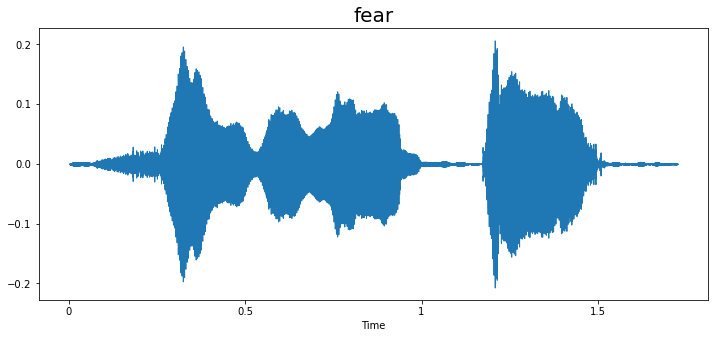

In [8]:
#visualizing fear 
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
Audio(path)

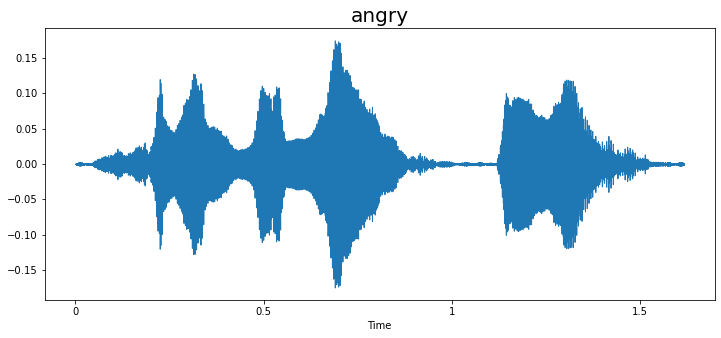

In [9]:
#Visualizing Anger
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
Audio(path)

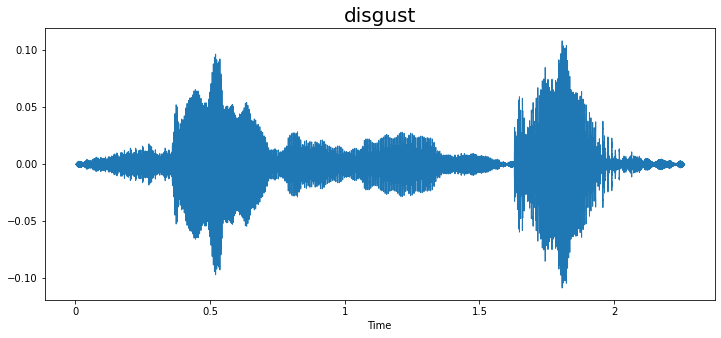

In [10]:
#Visualizing disgust
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
Audio(path)

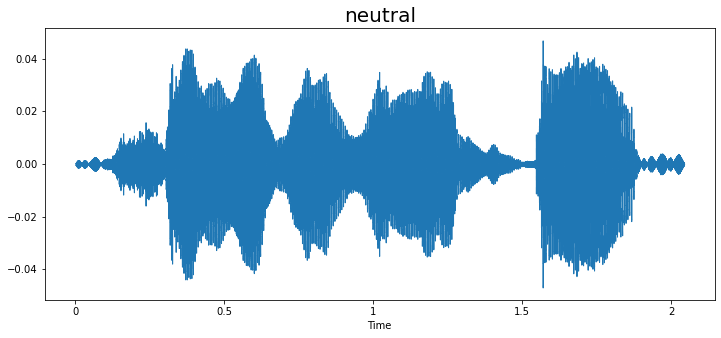

In [11]:
#Visualizing no emotion 
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
Audio(path)

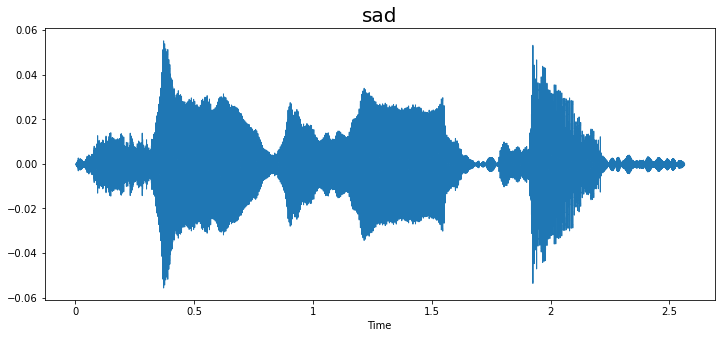

In [12]:
#Visualizing Sad emotion
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
Audio(path)

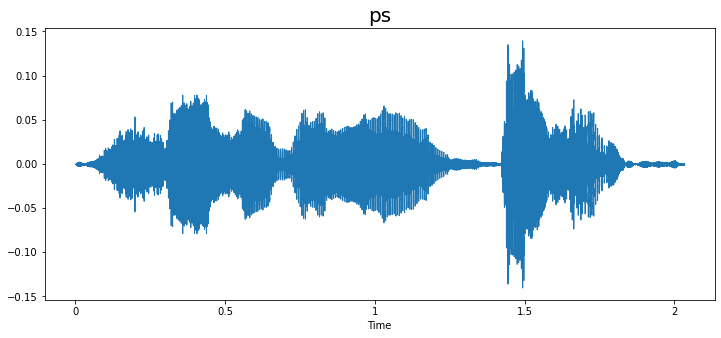

In [13]:
#Visualizing pleasent surprise
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
Audio(path)


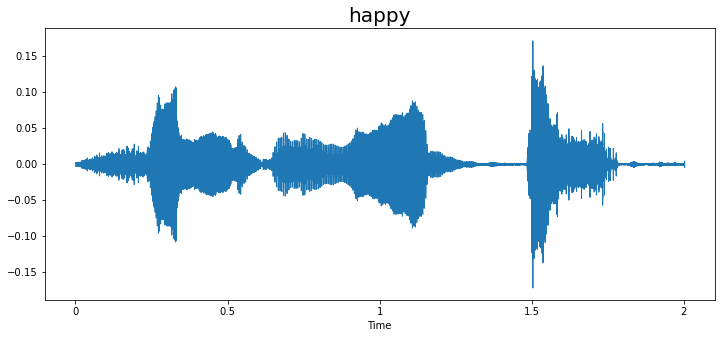

In [14]:
#Visualizing happy emotion
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

MFCC: Mel-Frequency Cepstral Coefficients

TO convert data in understandable format we use feature extraction, as it is not possible to understand the audio signals 
The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

EXPLAINATION OF MFCC: 
The MFCC feature extraction approach consists of windowing the signal, doing the DFT, calculating the log of the magnitude, and then warping the frequencies on a Mel scale, followed by performing the inverse DCT. 
The next section provides a full explanation of the many procedures involved in the MFCC feature extraction.

1. AD conversion: ANalog audio to digital

2. Pre-emphasis: It will filter and concentrate the sound on the higher frequencies.

3. Windowing: splitting the waveform into tiny (20-40ms) temporal segments to facilitate transformation.

4. DFT( Discrete Fourier Transform) : We will convert the signal from the time domain to the frequency domain by applying the dft transform. For audio signals, analyzing in the frequency domain is easier than in the time domain.n. 
            F= |F(log(|Ff(t)|2)|2

5. Mel-Filter Bank: So we will use the mel scale to map the actual frequency to the frequency that human beings will perceive. The formula for the mapping is given below.
    f= = 2595 log10(1 + f/ 700)
    
6. IDFT:Inverse Fast Fourier transform (IDFT) is an algorithm to undoes the process of DFT. It is also known as backward Fourier transform
In this step, we are doing the inverse transform of the output from the previous step. Before knowing why we have to do inverse transform we have to first understand how the sound produced by human beings.


REFERENCE: http://link.springer.com/content/pdf/bbm:978-3-319-49220-9/1.pdf 

In [15]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

#loads an audio file and decodes it into a 1-dimensional array which is a time series y , 
#and sr is a sampling rate of y . 
#Default sr is 22kHz. We can override the sr by sr
#here the output is 1D array

In [16]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622477e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100214e-01, -2.9795787e+00,  1.3149228e+00,
       -3.4300944e-01,  2.3402820e+00,  1.9168798e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256538e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321527e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294442e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034529e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [17]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [18]:
#By printing the shape of mfccs you get how many mfccs are calculated on how many frames. 
#he first value represents the number of mfccs calculated

X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.48027304, -31.61629...
2       [-431.5178, 48.56504, -0.89244896, 2.2234004, ...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873596, 18.061928, 6.0...
                              ...                        
2795    [-554.5794, 91.78299, 25.282017, 18.345247, 17...
2796    [-590.1003, 97.41461, 35.74892, 16.209633, 27....
2797    [-535.2709, 88.06032, 25.163685, 21.924894, 19...
2798    [-549.7413, 111.764175, 30.308115, 14.165435, ...
2799    [-550.9464, 104.709015, 29.937454, 28.579796, ...
Name: speech, Length: 2800, dtype: object

In [19]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

#number of files, no of mfcc

(2800, 40)

In [20]:
from sklearn.preprocessing import OneHotEncoder
encryp = OneHotEncoder()
y = encryp.fit_transform(df[['label']])
print(y)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (2775, 6)	1.0
  (2776, 6)	1.0
  (2777, 6)	1.0
  (2778, 6)	1.0
  (2779, 6)	1.0
  (2780, 6)	1.0
  (2781, 6)	1.0
  (2782, 6)	1.0
  (2783, 6)	1.0
  (2784, 6)	1.0
  (2785, 6)	1.0
  (2786, 6)	1.0
  (2787, 6)	1.0
  (2788, 6)	1.0
  (2789, 6)	1.0
  (2790, 6)	1.0
  (2791, 6)	1.0
  (2792, 6)	1.0
  (2793, 6)	1.0
  (2794, 6)	1.0
  (2795, 6)	1.0
  (2796, 6)	1.0
  (2797, 6)	1.0
  (2798, 6)	1.0
  (2799, 6)	1.0


In [21]:
y = y.toarray()

In [22]:
y.shape

(2800, 7)

## Splitting the dataset

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2100, 40), (2100, 7), (700, 40), (700, 7))

## Scaling 

In [24]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2100, 40), (2100, 7), (700, 40), (700, 7))

In [25]:
def predict(ml_model):
    ml_model = ml_model.fit(x_train,y_train)

    print("Training set score: {:.3f}".format(ml_model.score(x_train, y_train)))
    print("Test set score: {:.3f}".format(ml_model.score(x_test, y_test)))  

### KNeighborsRegressor Model

In [26]:
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor())

Training set score: 0.988
Test set score: 0.974


### RandomForestRegressor Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

Training set score: 0.996
Test set score: 0.958


### DecisionTreeRegressor Model

In [28]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

Training set score: 1.000
Test set score: 0.954


### DecisionTreeRegressor Model

In [29]:
from xgboost import XGBRegressor
predict(XGBRegressor())

Training set score: 1.000
Test set score: 0.969


## DECISION TREE CLASSIFIER

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Training set score: 1.000
Test set score: 0.977


In [31]:
print(y_pred)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        90
           1       0.96      0.96      0.96        95
           2       0.98      0.98      0.98        97
           3       0.98      0.94      0.96       107
           4       1.00      1.00      1.00       102
           5       0.95      0.98      0.97       114
           6       0.98      1.00      0.99        95

   micro avg       0.98      0.98      0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700
 samples avg       0.98      0.98      0.98       700



## CNN MODEL

Every LSTM layer requires three-dimensional input.
This input has three dimensions:

One sequence equals one sample. A batch contains one or more samples.

time step: A time step corresponds to one point of observation in the sample.

Features: One feature is that just one observation is made at a time step.

In [33]:
#The reshape() function on NumPy arrays can be used to reshape your 1D or 2D data to be 3D.
#The reshape() function takes a tuple as an argument that defines the new shape.


x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((2100, 40, 1), (2100, 7), (700, 40, 1), (700, 7))

In [34]:
#LSTM : overcome RNN issue, in RNN gradients can explode iwhen each weight gets multiplied by input value, 
#   here lstm creates 2 memories and uses activation function
#Dropout : to reduce overfitting, here the neurals get dropped out by the defined probablity in our case 0.2, 
#    they will keep the weight but in every epoch the dropout neurals will get changed

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

cnn_model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 305,799
Trainable params: 305,799
Non-trai

In [36]:
his = cnn_model.fit(x_traincnn, y_train, batch_size=64, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50
33/33 [==============================] - 7s 119ms/step - loss: 1.2747 - accuracy: 0.5357 - val_loss: 0.7300 - val_accuracy: 0.7257
Epoch 2/50
33/33 [==============================] - 3s 98ms/step - loss: 0.5340 - accuracy: 0.8086 - val_loss: 0.3165 - val_accuracy: 0.8929
Epoch 3/50
33/33 [==============================] - 4s 108ms/step - loss: 0.3018 - accuracy: 0.8976 - val_loss: 0.2181 - val_accuracy: 0.9257
Epoch 4/50
33/33 [==============================] - 4s 120ms/step - loss: 0.2546 - accuracy: 0.9186 - val_loss: 0.2307 - val_accuracy: 0.9186
Epoch 5/50
33/33 [==============================] - 4s 117ms/step - loss: 0.2056 - accuracy: 0.9343 - val_loss: 0.1679 - val_accuracy: 0.9414
Epoch 6/50
33/33 [==============================] - 4s 107ms/step - loss: 0.1844 - accuracy: 0.9386 - val_loss: 0.1350 - val_accuracy: 0.9586
Epoch 7/50
33/33 [==============================] - 3s 103ms/step - loss: 0.1757 - accuracy: 0.9410 - val_loss: 0.1542 - val_accuracy: 0.9429
Epoch 8

In [37]:
print("Accuracy of our model on test data : " , cnn_model.evaluate(x_testcnn,y_test)[1]*100 , "%")

22/22 [==============================] - 1s 34ms/step - loss: 0.1567 - accuracy: 0.9686
Accuracy of our model on test data :  96.8571424484253 %


In [38]:
pred_test = cnn_model.predict(x_testcnn)
y_pred = encryp.inverse_transform(pred_test)

y_test = encryp.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(5)

22/22 [==============================] - 1s 39ms/step


,Predicted Labels,Actual Labels
0,sad,sad
1,angry,angry
2,disgust,disgust
3,ps,ps
4,ps,ps
